<a href="https://colab.research.google.com/github/gshatko/urban_analytics/blob/main/solver_FLP_hospital_tver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install git+https://github.com/ValeriyaTikhevich/solver_FLP.git@main

  Cloning https://github.com/ValeriyaTikhevich/solver_FLP.git (to revision main) to /tmp/pip-req-build-8joksui5
  Running command git clone --filter=blob:none --quiet https://github.com/ValeriyaTikhevich/solver_FLP.git /tmp/pip-req-build-8joksui5
  Resolved https://github.com/ValeriyaTikhevich/solver_FLP.git to commit 16fc023ce6c9b33bd9931ccaa63e1546630c025a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 36.4 MB/s eta 0:00:00
  Created wheel for solver_FLP: filename=solver_flp-0.0.1-py3-none-any.whl size=10026 sha256=ad57150280718c4413e415c425ebee443cf3f6f38aed182aa0502b0ac44bc644
  Stored in directory: /tmp/pip-ephem-wheel-cache-9_gztawn/wheels/8f/9c/dd/929ec63c056f1997764422a596ab1993ca8f8d1d0f739fcc4c
Successfully built solver_FLP


In [3]:
from method import genetic_algorithm_main, choose_edges, fitness_plot

In [4]:

from method import genetic_algorithm_main, choose_edges, fitness_plot, block_coverage, services_plot, connect_blocks_plot
import os
import pandas as pd
import geopandas as gpd
import numpy as np

local_crs = 32636
example_data_path = "./data/"

import warnings
warnings.filterwarnings("ignore")

In [6]:
accessibility_matrix = pd.read_pickle(os.path.join("/data/acc_mx-2.pickle"))
df_with_demand = gpd.read_file(os.path.join("/data/provision_after-2.geojson")).to_crs(local_crs)
df_with_demand.head()

,id,demand,capacity,capacity_left,demand_left,demand_within,demand_without,provision,geometry
0,0,2,0.0,0.0,2,0,0,0.0,"POLYGON ((679937.828 6301979.985, 679929.415 6..."
1,1,0,0.0,0.0,0,0,0,NaN,"POLYGON ((679601.444 6302740.071, 679565.984 6..."
2,2,0,0.0,0.0,0,0,0,NaN,"POLYGON ((679885.492 6302678.076, 679872.348 6..."
3,3,0,0.0,0.0,0,0,0,NaN,"POLYGON ((680032.039 6303025.553, 679980.526 6..."
4,4,9,0.0,0.0,0,9,0,1.0,"POLYGON ((679105.545 6303138.309, 679099.724 6..."


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:

SERVICE_RADIUS = 15

# Genetic algorithm parameters
population_size = 5
num_generations = 20
num_parents = 10
num_offspring = population_size - num_parents
mutation_rate = 0.7

In [38]:

uncovered_demand['demand_without'] = uncovered_demand['demand_left']
accessibility_matrix_uncovered_demand = accessibility_matrix.loc[uncovered_demand.index, uncovered_demand.index]
id_matrix = accessibility_matrix_uncovered_demand.index.tolist()

uncovered_demand.reset_index(drop=True, inplace=True)
accessibility_matrix_uncovered_demand.reset_index(drop=True, inplace=True)
accessibility_matrix_uncovered_demand.columns=accessibility_matrix_uncovered_demand.index

In [39]:
edges_uncovered_demand = choose_edges(sim_matrix = accessibility_matrix_uncovered_demand, service_radius = SERVICE_RADIUS)
len(edges_uncovered_demand)

100%|██████████| 115/115 [00:00<00:00, 511.66it/s]


38

In [40]:
best_candidate, fitness_history = genetic_algorithm_main(matrix = accessibility_matrix_uncovered_demand,
                                   edges = edges_uncovered_demand, population_size = population_size,
                                   num_generations = num_generations, df = uncovered_demand,
                                   service_radius = SERVICE_RADIUS, mutation_rate = mutation_rate,
                                   num_parents = num_parents, num_offspring = num_offspring, number_res = 'all')

100%|██████████| 20/20 [30:31<00:00, 91.58s/it]


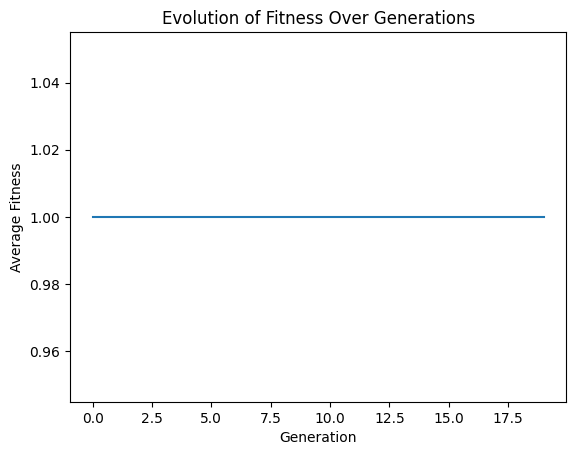

In [41]:
fitness_plot(fitness_history)

In [42]:
capacities, res_id = block_coverage(best_candidate, SERVICE_RADIUS, uncovered_demand, id_matrix)

print([num for num in capacities if num > 0])
res_id

[786.0]


{1: [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114]}

In [43]:

selected_potential_services = gpd.GeoDataFrame(df_with_demand.loc[:, 'geometry']).loc[list(res_id.keys()), :]
selected_potential_services['capacity'] = [capacity for capacity in capacities if capacity > 0]

arr_index = np.intersect1d(selected_potential_services.index, df_with_demand[df_with_demand['capacity']>0].index)

for i in arr_index:
    selected_potential_services.loc[i, 'capacity'] += df_with_demand.loc[i, 'capacity']

In [44]:

df_opt = df_with_demand.sjoin(selected_potential_services.to_crs(local_crs), how='left', lsuffix='osn').fillna(0)
df_opt['capacity'] = df_opt['capacity_osn'] + df_opt['capacity_right']
df_opt.drop(columns = ['capacity_osn', 'index_right', 'capacity_right'], inplace=True)

In [46]:
policlinics = gpd.read_file(os.path.join(example_data_path, "/data/dataframe.geojson")).to_crs(local_crs)
policlinics['our_service'] = policlinics[policlinics['geometry'].notnull()]['geometry'].apply(lambda point: '+' if any(point.within(poly) for poly in df_opt.drop(arr_index)['geometry']) else '-')


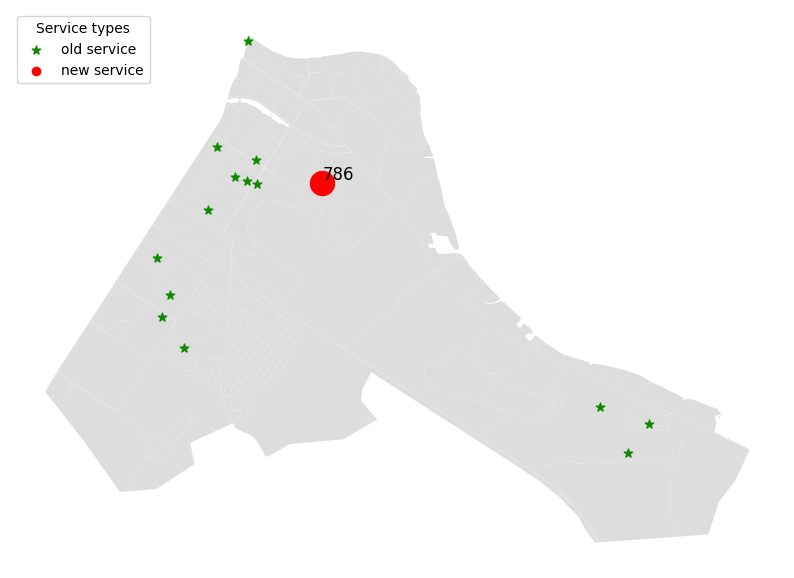

In [47]:
services_plot(df_with_demand, df_opt, res_id,
              policlinics, size_factor=100, alpha=0.05,
              size_factor_2=100, alpha_2=0.05, x=20, y=50, x_2=10, y_2=50)

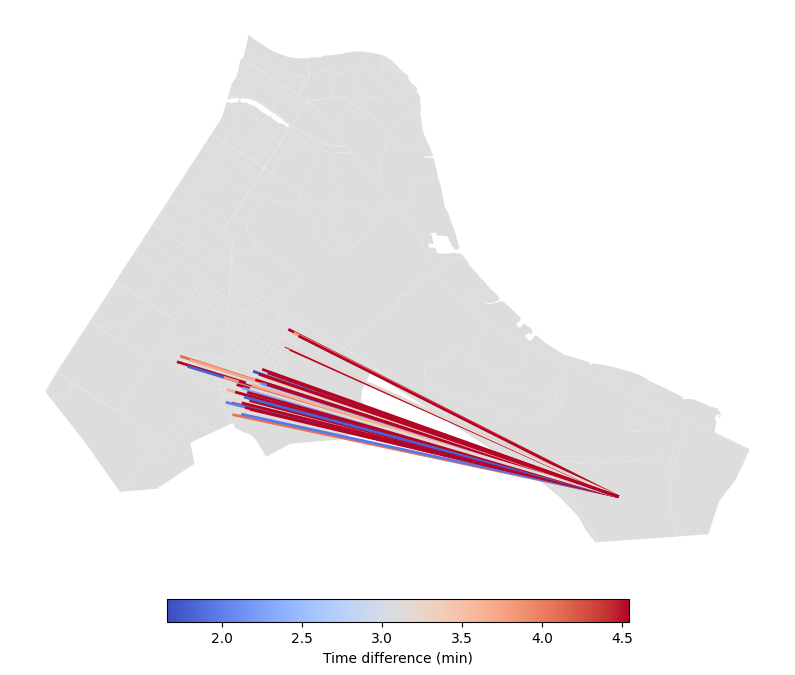

In [48]:
connect_blocks_plot(id_matrix, accessibility_matrix_uncovered_demand, df_opt, best_candidate)